# Data Science Project 1

## 1. Business Understanding

#### In this project I will be analyzing Stackoverflow survey 2017 dataset. And answer the questions below using Pandas, Numpy and Scikit-learn

### Questions
1. How would you rank the most used programming languages among respondents?
2. Is there a difference in programming languages between people with high salaries and those with low salaries?
3. Which feature can best predict salary?
4. Can you find a pattern related to salary using the best column in the results of Q3?

## 2. Data Understanding

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Import dataset

#### function to import dataset

In [2]:
def import_data():
    return pd.read_csv('./survey_results_public_2017.csv')

In [58]:
df = import_data()
print(f"df shape: {df.shape}")
df.head(3)

df shape: (51392, 154)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,"37,500.00000"
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,"113,750.00000",NaN


#### Check for nan values

In [4]:
df_null = df.isnull().sum()
print(f"There are {len(df.columns[df_null>0])} columns with at least one nan value")

There are 147 columns with at least one nan value


#### Check for datatypes for each columns

In [5]:
print("Data type of columns in dataframe")
df.dtypes.value_counts()

Data type of columns in dataframe


object     147
float64      6
int64        1
dtype: int64

### Next CRISP-DM process will be done for each questions

***

## Q1. How would you rank the most used programming languages among respondents?

### 3. Data Preparation

#### To answer this question I will use 'HaveWorkedLanguage' column

In [6]:
df.HaveWorkedLanguage.to_frame()

,HaveWorkedLanguage
0,Swift
1,JavaScript; Python; Ruby; SQL
2,Java; PHP; Python
3,Matlab; Python; R; SQL
4,NaN
...,...
51387,C#; JavaScript; Python; SQL; VB.NET; VBA
51388,Java; SQL
51389,NaN
51390,JavaScript; PHP; Swift


#### Each row of 'HaveWorkedLanguage' column has multiple choices, so I will use customized dummy function to make the job easier

#### Customized function to get dummy

In [7]:
def categorize_feature(series):
    series = series.apply(lambda value: list(value.replace(' ', '').split(';'))
                       if type(value)!=float
                       else float('nan'))
    return pd.get_dummies(series.apply(pd.Series).stack(dropna=False)).sum(level=0)    

In [8]:
df_language = categorize_feature(df.HaveWorkedLanguage)
df_language.head()

,Assembly,C,C#,C++,Clojure,CoffeeScript,CommonLisp,Dart,Elixir,Erlang,...,Ruby,Rust,SQL,Scala,Smalltalk,Swift,TypeScript,VB.NET,VBA,VisualBasic6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Count the number of times each language is used

In [9]:
language_usage = df_language.sum().to_frame().T
language_usage.rename(index={0:'Count'}, inplace=True)

#### Sort

In [10]:
language_usage = language_usage.sort_values(by="Count", axis=1, ascending=False)
language_usage

,JavaScript,SQL,Java,C#,Python,PHP,C++,C,TypeScript,Ruby,...,F#,Rust,Clojure,Elixir,Smalltalk,Erlang,CommonLisp,Dart,Julia,Hack
Count,22875,18754,14524,12476,11704,10290,8155,6974,3488,3324,...,457,416,391,380,327,281,273,145,138,107


### ~~4. Modeling~~

### 5. Evaluation

#### Visualize result

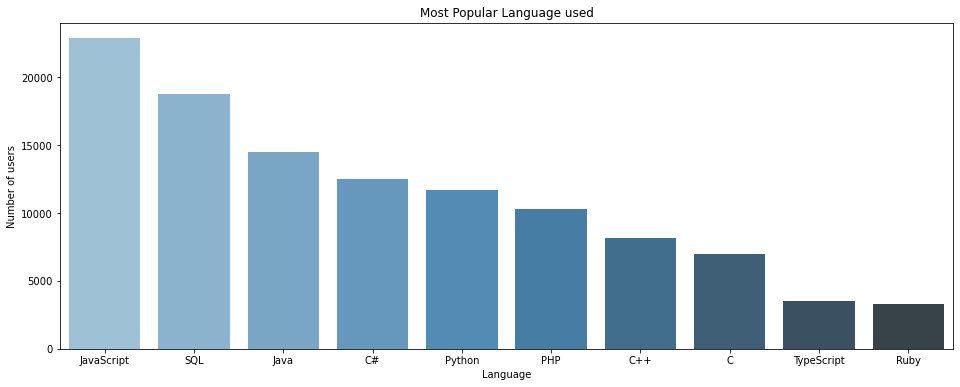

In [11]:
plt.figure(figsize=(16,6))
sns.barplot(data=language_usage.iloc[:, :10], palette="Blues_d")
plt.title('Most Popular Language used')
plt.ylabel('Number of users')
plt.xlabel('Language')
plt.show()

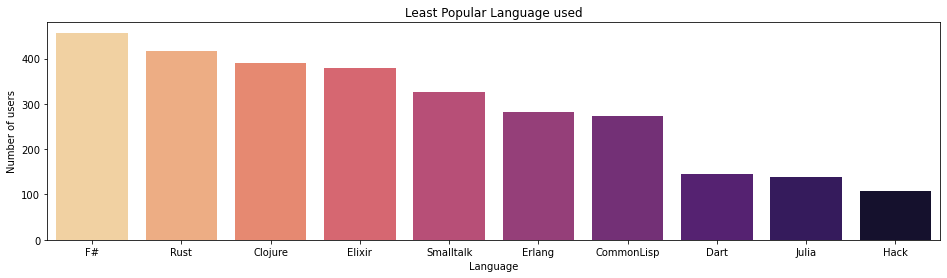

In [12]:
plt.figure(figsize=(16,4))
sns.barplot(data=language_usage.iloc[:, -10:], palette="magma_r")

plt.title('Least Popular Language used')
plt.ylabel('Number of users')
plt.xlabel('Language')
plt.show()

### 6. Deployment

#### Many developers on stackoverflow prefer programming languages such as Javascript, SQL, Java, C#, and Python. However, on the contrary, programming languages such as CommonLisp, Dart, and Julia Hack were not preferred.

***

## Q2. Is there a difference in programming languages between people with high salaries and those with low salaries?

### 3. Data Preparation

#### Distribution of salary 

<AxesSubplot:xlabel='Salary', ylabel='Density'>

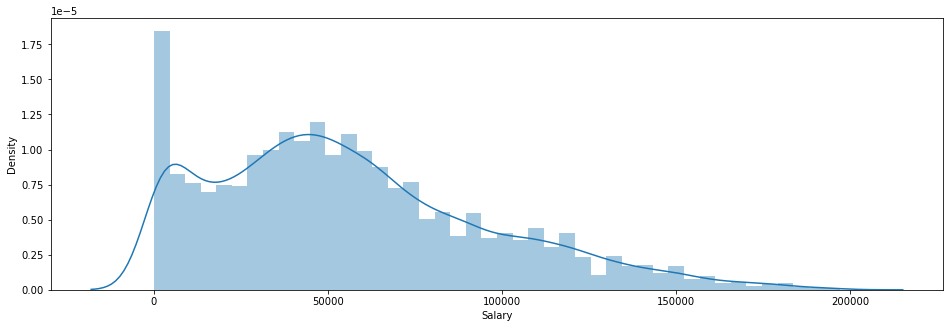

In [64]:
plt.figure(figsize=(16,5))
df_salary = df.dropna(subset='Salary', axis=0)
sns.distplot(df_salary.Salary)

#### Sort df_salary by salary

In [14]:
salary_sorted = df_salary.sort_values(by='Salary', ascending=True)

#### I will compare salary with top 20% and bottom 20%

In [15]:
number_threshold = int(0.2*salary_sorted.shape[0])
high_salary = salary_sorted.iloc[-number_threshold:, :].loc[:, ['HaveWorkedLanguage','Salary']]
low_salary = salary_sorted.iloc[:number_threshold, :].loc[:, ['HaveWorkedLanguage','Salary']]

#### Get dummies using function from question 1

In [16]:
high_salary_languages = categorize_feature(high_salary.HaveWorkedLanguage)
low_salary_languages = categorize_feature(low_salary.HaveWorkedLanguage)

#### Sum and sort each programming language

In [17]:
high_salary_languages = high_salary_languages.sum().to_frame().T
high_salary_languages.rename(index={0:'Count'}, inplace=True)
high_salary_languages = high_salary_languages.sort_values(by="Count", axis=1, ascending=False)

low_salary_languages = low_salary_languages.sum().to_frame().T
low_salary_languages.rename(index={0:'Count'}, inplace=True)
low_salary_languages = low_salary_languages.sort_values(by="Count", axis=1, ascending=False)

### ~~4. Modeling~~

### 5. Evaluation

#### Visualize result

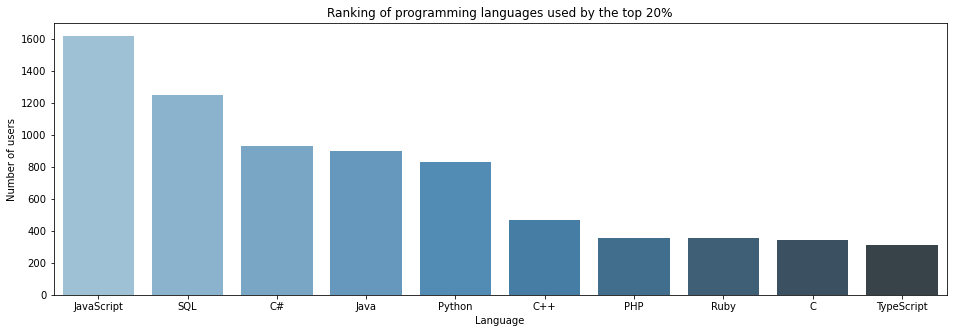

In [65]:
plt.figure(figsize=(16,5))
sns.barplot(data=high_salary_languages.iloc[:, :10], palette="Blues_d")

plt.title('Ranking of programming languages used by the top 20%')
plt.ylabel('Number of users')
plt.xlabel('Language')
plt.show()

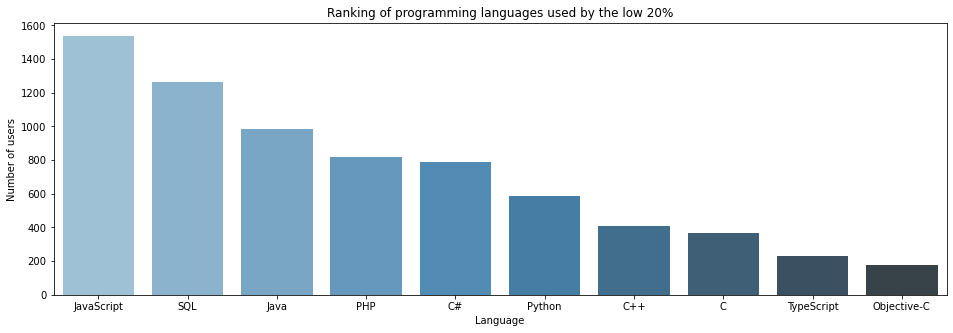

In [66]:
plt.figure(figsize=(16,5))
sns.barplot(data=low_salary_languages.iloc[:, :10], palette="Blues_d")

plt.title('Ranking of programming languages used by the low 20%')
plt.ylabel('Number of users')
plt.xlabel('Language')
plt.show()

### 6. Deployment

#### According to the results, the salary does not seem to change depending on the programming language used. Therefore, there seems to be a different factor that affects salary, and we have to look for it.

***

## Q3. Which feature can best predict salary?

### 3. Data Preparation
#### I will see how well each column predict through machine learning, so I will store the preprocessed columns as a dictionary.

In [20]:
X_dict = {}

#### Drop row if salary is nan

In [21]:
df = df.dropna(subset='Salary', axis=0)

#### Get X, y data

In [22]:
X = df.drop('Salary', axis=1)
y = df.Salary

#### Drop unnecessary columns or columns with all values of nan

In [23]:
X = X.drop('Respondent', axis=1)
X = X.dropna(how='all', axis=1)

#### Fill the nan values of numeric columns as average values

In [24]:
columns_numeric = X.select_dtypes(include='float').columns
for col in columns_numeric:
    tmp = X[col]   
    mean = tmp.mean()
    tmp = tmp.fillna(mean, axis=0)
    X_dict[col] = tmp

#### Drop numeric columns from X

In [25]:
X = X.drop(columns=columns_numeric)

#### Get dummies using customized method

Function to get dummies if there is only one value

In [26]:
def get_dummy_simple(series, dummy_na=False):
    df = pd.DataFrame()
    try:
        df = pd.get_dummies(series, prefix=series.name, prefix_sep='_', drop_first=False, dummy_na=dummy_na)
    except:
        print(f"Error with get_dummy_simple(), column: {series.name}")
    return df

Function to check if there is multiple values

In [27]:
def get_multiple_value_columns(df):
    contain_semicolons = df.apply(lambda col: 
                                  col.str.contains(';').any()
                                  if col.dtypes==object
                                  else False)
    df_contain_semicolons = df.loc[:, contain_semicolons]
    multiple_value_columns = df_contain_semicolons.columns
    return multiple_value_columns

Customized get dummie function

In [28]:
def categorize_feature(series):
    series = series.apply(lambda value: list(value.replace(' ','').split(';'))
                       if type(value)!=float
                       else float('nan'))
    return pd.get_dummies(series.apply(pd.Series).stack(dropna=False), prefix=series.name, prefix_sep='_').sum(level=0)    

Get dummies

In [29]:
multiple_value_columns = get_multiple_value_columns(X)
for col in X.columns:
    if col in multiple_value_columns:
        tmp = categorize_feature(X[col])
    else:
        tmp = get_dummy_simple(X[col])
    X_dict[col] = tmp

### 4. Modeling 

#### Function to get r2socre

In [30]:
def get_r2score(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)
    model = LinearRegression(normalize=True)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = r2_score(y_test, pred)
    return score    

#### Get the results

In [31]:
results = []
for col, _X in X_dict.items():
    if col in columns_numeric:
        _X = _X.values.reshape(-1,1)
    score = get_r2score(_X, y)
    results.append([col, score])

#### Sort and make dataframe

In [32]:
result = pd.DataFrame(results).rename(columns={0:'Columns', 1:'Scores'}).set_index('Columns')

In [33]:
result = result.sort_values(by='Scores', ascending=False)
pd.options.display.float_format = '{:,.5f}'.format

### 5. Evaluation

In [34]:
result[:15]

,Scores
Columns,
Currency,0.41677
YearsCodedJob,0.20302
YearsProgram,0.17682
CompanyType,0.10318
IDE,0.07145
JobProfile,0.07008
ImportantBenefits,0.06665
Race,0.06423
HaveWorkedLanguage,0.05968


#### Drop 'Country' index because its value is way out of range

In [35]:
print(f"Score of Country: {result.loc['Country',:]}")
result = result.drop('Country', axis=0)

Score of Country: Scores   -77,097,023,411,103,631,717,433,344.00000
Name: Country, dtype: float64


#### Visualize

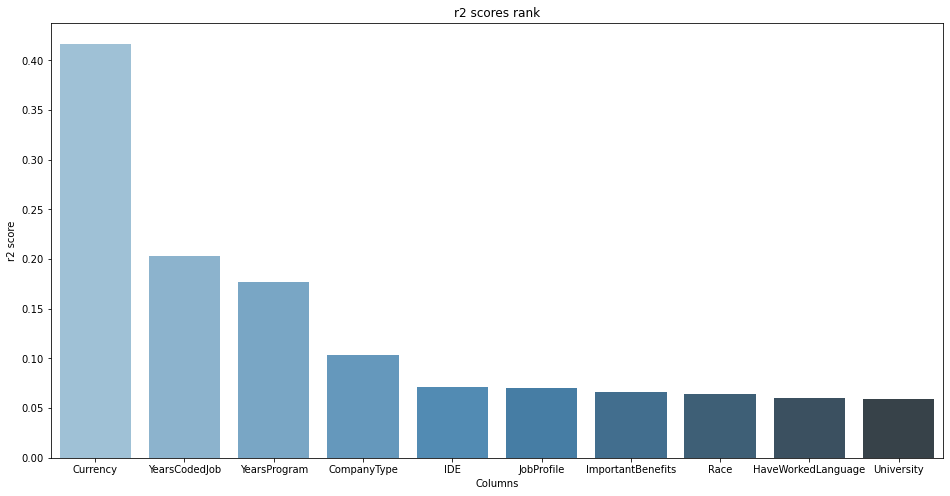

In [51]:
plt.figure(figsize=(16,8))
sns.barplot(data=result[:10].T, palette="Blues_d")

plt.title('r2 scores rank')
plt.ylabel('r2 score')
plt.xlabel('Columns')
plt.show()

### 6. Deployment

#### According to the result, it can be seen that `currency` column has the highest r2 score of 0.4167. And the r2 score of the `HaveWorkedLanguage` column only had a value of 0.0596, which was low in terms of accuracy. This result is very similar to the result found in Question 2, indicating that the exact salary cannot be predicted using only the `HaveWorkedLanguage` column.

***

## Q4. Can you find a pattern related to salary using the best column in the results of Q3?

#### I will use `Currency` column to find pattern using `salary_sorted` and `number_threshold` from Q2

### 3. Data Preparation

In [44]:
number_threshold = int(0.2*salary_sorted.shape[0])
high_salary = salary_sorted.iloc[-number_threshold:, :].loc[:, ['Currency','Salary']]
low_salary = salary_sorted.iloc[:number_threshold, :].loc[:, ['Currency','Salary']]

In [47]:
high_salary_currency = categorize_feature(high_salary.Currency)
low_salary_currency = categorize_feature(low_salary.Currency)

In [48]:
high_salary_currency = high_salary_currency.sum().to_frame().T
high_salary_currency.rename(index={0:'Count'}, inplace=True)
high_salary_currency = high_salary_currency.sort_values(by="Count", axis=1, ascending=False)

low_salary_currency = low_salary_currency.sum().to_frame().T
low_salary_currency.rename(index={0:'Count'}, inplace=True)
low_salary_currency = low_salary_currency.sort_values(by="Count", axis=1, ascending=False)

### ~~4. Modeling~~

### 5. Evaluation

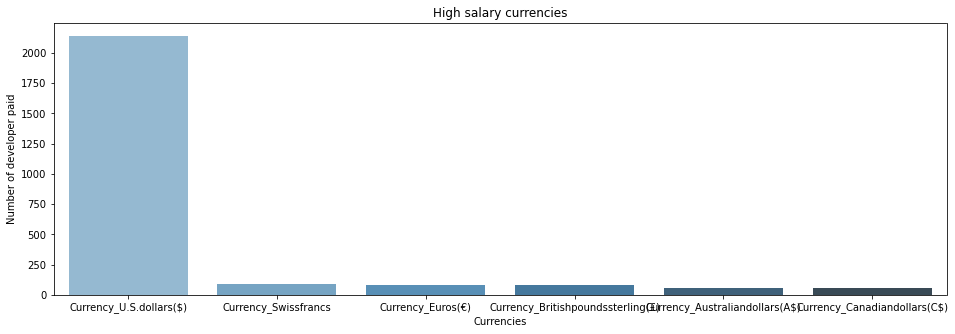

In [55]:
plt.figure(figsize=(16,5))
sns.barplot(data=high_salary_currency.iloc[:, :6], palette="Blues_d")

plt.title('High salary currencies')
plt.ylabel('Number of developer paid')
plt.xlabel('Currencies')
plt.show()

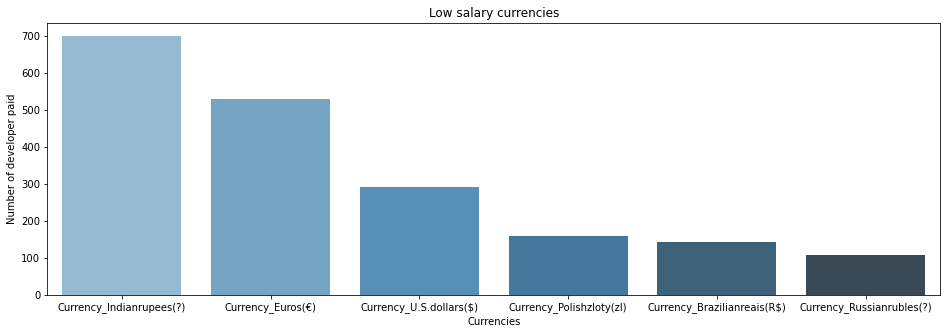

In [56]:
plt.figure(figsize=(16,5))
sns.barplot(data=low_salary_currency.iloc[:, :6], palette="Blues_d")

plt.title('Low salary currencies')
plt.ylabel('Number of developer paid')
plt.xlabel('Currencies')
plt.show()

### 6. Deployment

#### Judging from the results of the graph, it was found that most of the developers with high salaries received their salaries in USD. On the other hand, it was found that if the salary was low, the salary was received in several different currencies.